# An Analysis of Steam Video Games


## Introduction

Steam is probably the largest PC game digital distribution service. I found two datasets on essentially the entire Steam library, both of which had elements I liked. As such, I'll be combining them. Data is very flawed, but we should still be able to see things of interest.

## My Approach

To avoid overwhelming my poor chromebook with too much data, I'll be ch
I'll also break apart the tags to see if a model to predict scores can be made
### The Datasets

Col |Descrition
-----|----- 
Data1|Data2
Data1|Data2
Data1|Data2
Data1|Data2


### Imported Libraries


In [247]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from ast import literal_eval
from IPython.display import display_html

# To save time and steps, I only imported relevant columns from the csv. Notice how I set
# the delimiter to ';' as the data wasn't comma-separated.
game_data_git = pd.read_json("https://github.com/leinstay/steamdb/raw/main/steamdb.json")
game_data_kag = pd.read_csv("steam_games.csv", delimiter=";", dtype= {'Initial Price': float},
                            usecols=['App ID', 'Tags', 'Initial Price'])
print("\nGit Data:\n")
display(game_data_git)
print("\n\nKaggle Data:\n")
display(game_data_kag)


Git Data:



,sid,store_url,store_promo_url,store_uscore,published_store,published_meta,published_stsp,published_hltb,published_igdb,image,...,meta_url,meta_score,meta_uscore,grnk_score,igdb_url,igdb_single,igdb_complete,igdb_score,igdb_uscore,igdb_popularity
0,10,https://store.steampowered.com/app/10,https://www.youtube.com/watch?v=oKC9SAF4JAc,97.0,2000-11-01,2000-11-08,2000-11-01,1999-06-12,1999-06-12,https://steamcdn-a.akamaihd.net/steam/apps/10/...,...,https://www.metacritic.com/game/pc/counter-str...,88.0,92.0,NaN,https://www.igdb.com/games/counter-strike,NaN,NaN,70.0,83.0,25.74
1,20,https://store.steampowered.com/app/20,None,84.0,1999-04-01,1999-04-07,1999-04-01,1999-04-07,1999-04-07,https://steamcdn-a.akamaihd.net/steam/apps/20/...,...,https://www.metacritic.com/game/pc/team-fortre...,NaN,71.0,NaN,https://www.igdb.com/games/team-fortress-classic,NaN,NaN,NaN,70.0,1.67
2,30,https://store.steampowered.com/app/30,https://www.youtube.com/watch?v=j4MCo89bTWE,90.0,2003-05-01,2003-05-06,2003-05-01,2000-08-04,2003-05-01,https://steamcdn-a.akamaihd.net/steam/apps/30/...,...,https://www.metacritic.com/game/pc/day-of-defe...,79.0,91.0,NaN,https://www.igdb.com/games/day-of-defeat,NaN,NaN,71.0,76.0,1.45
3,40,https://store.steampowered.com/app/40,https://www.youtube.com/watch?v=jN_18uhiMS8,82.0,2001-06-01,2001-06-07,2001-06-01,2001-06-01,2001-07-01,https://steamcdn-a.akamaihd.net/steam/apps/40/...,...,https://www.metacritic.com/game/pc/deathmatch-...,NaN,68.0,NaN,https://www.igdb.com/games/deathmatch-classic,NaN,NaN,NaN,75.0,1.00
4,50,https://store.steampowered.com/app/50,https://www.youtube.com/watch?v=ZNZsWm-Ulk4,95.0,1999-11-01,1999-10-31,1999-11-01,1999-11-01,1999-11-10,https://steamcdn-a.akamaihd.net/steam/apps/50/...,...,https://www.metacritic.com/game/pc/half-life-o...,NaN,86.0,NaN,https://www.igdb.com/games/half-life-opposing-...,6.0,4.0,70.0,82.0,3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53976,1966310,https://store.steampowered.com/app/1966310,None,NaN,2022-04-22,None,None,None,None,https://cdn.akamai.steamstatic.com/steam/apps/...,...,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
53977,1971880,https://store.steampowered.com/app/1971880,None,NaN,2022-04-22,None,None,2016-12-09,None,https://cdn.akamai.steamstatic.com/steam/apps/...,...,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
53978,1971980,https://store.steampowered.com/app/1971980,None,NaN,2022-04-21,None,None,None,None,https://cdn.akamai.steamstatic.com/steam/apps/...,...,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
53979,1976030,https://store.steampowered.com/app/1976030,None,NaN,2022-04-24,None,None,None,None,https://cdn.akamai.steamstatic.com/steam/apps/...,...,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN




Kaggle Data:



,App ID,Tags,Initial Price
0,10,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",999.0
1,1000000,"""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",999.0
2,1000010,"Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",1999.0
3,1000030,"Typing: 221, Management: 213, Casual: 209, Dif...",1999.0
4,1000040,"Action: 22, Casual: 22, Indie: 21, Simulation: 20",199.0
...,...,...,...
55686,999880,"Education: 22, VR: 6, Space: 5",0.0
55687,999890,"Casual: 21, Indie: 21, Adventure: 20",299.0
55688,999900,"Animation & Modeling: 25, 3D: 13",0.0
55689,999930,"Early Access: 21, Indie: 20, RPG: 20, Strategy...",499.0


## Prepping / Cleaning the Data

### Dropping Columns

One hot encoding for the difficulty. Consolidate length by removing
gfq and igdb length (and also popularity as they're apperently no longer supported in the API). Remove steam
spy stuff as it has issues with accuracy.
### Dropping Rows


### Format Cleanup
The price values are missing decimal points. 
Set published_store to date time

In [248]:
# Check for missing values
print("\n\n\nMissing Values Count Kaggle Data:\n ")
print(game_data_kag.isnull().sum())

print("\n\n\nMissing Values Count Github Data:\n ")
print(game_data_git.isnull().sum())

# Dropping the unused columns in the git table
game_data_git.drop(inplace=True, columns=['store_url', 'store_promo_url', 'published_meta', 'published_stsp',
                                          'published_hltb', 'published_igdb', 'image', 'description',
                                          'voiceovers', 'gfq_url', 'gfq_rating_comment', 'gfq_length_comment',
                                          'hltb_url', 'meta_url', 'igdb_url', 'achievements', 'discount',
                                          'igdb_popularity', 'igdb_single', 'igdb_complete', 'gfq_length',
                                          'stsp_owners', 'stsp_mdntime', 'gfq_difficulty_comment', 'tags',
                                          'full_price', 'current_price', 'grnk_score', 'genres'])




Missing Values Count Kaggle Data:
 
App ID             0
Tags             135
Initial Price      0
dtype: int64



Missing Values Count Github Data:
 
sid                           0
store_url                     0
store_promo_url           46435
store_uscore              20519
published_store             150
published_meta            20378
published_stsp            34365
published_hltb            28150
published_igdb            33016
image                         0
name                          0
description                  49
full_price                 7164
current_price              7164
discount                  47452
platforms                     0
developers                   94
publishers                    0
languages                    17
voiceovers                29801
categories                   70
genres                        0
tags                      33608
achievements              25265
gfq_url                   21375
gfq_difficulty            41626
gfq_difficulty

In [249]:
# Joining the two data tables. We'll do an inner merge, using the store ID, since if they're not in both
# they're probably too obscure to be of value anyways.
game_data = pd.merge(left=game_data_git, right=game_data_kag, how='inner', left_on='sid', right_on='App ID')

# Drop the App ID column as it's no longer needed
game_data.drop('App ID', inplace=True, axis=1)

# Encode the difficulties in a scale. There's encoders, but a simple find and replace works well here.
print(game_data['gfq_difficulty'].unique()) # See the values to encode

replace_dict = {'Just Right-Tough':2.5, 'Just Right':2, 'Easy-Just Right':1.5, 'Tough':3,
              'Tough-Unforgiving':3.5, 'Unforgiving':4, 'Easy':1, 'Simple':0, 'Simple-Easy':0.5}


game_data.replace({'gfq_difficulty':replace_dict}, inplace=True)

['Just Right-Tough' 'Just Right' 'Easy-Just Right' 'Tough' None
 'Tough-Unforgiving' 'Unforgiving' 'Easy' 'Simple' 'Simple-Easy']


In [250]:


#tags_df = pd.DataFrame(literal_eval(game_data['Tags']))

#print("\n\n\nFinal Missing Values Count:\n ")
#print(game_data.isnull().sum())

In [251]:
# Fix the initial price by dividing by 100
game_data['Initial Price'] = game_data['Initial Price'] / 100

# Format published data as datetime
game_data['published_store'] = pd.to_datetime(game_data['published_store'])
# Scale gfq_rating to be out of 100 like the others
game_data['gfq_rating'] = game_data['gfq_rating'] * 20

# Get rid of rows that have no review score
game_data.dropna(how='all', subset=['store_uscore', 'meta_score', 'meta_uscore',
                                    'igdb_score', 'gfq_rating', 'igdb_uscore'], inplace=True)

# Add average score columns
game_data['avg_uscore'] = game_data[['store_uscore', 'meta_uscore',
                                     'igdb_uscore', 'gfq_rating']].mean(axis=1)
game_data['avg_critic_score'] = game_data[['meta_score', 'igdb_score']].mean(axis=1)

 ## Data rep visu

                sid  store_uscore  gfq_difficulty    gfq_rating   hltb_single  \
count  3.205600e+04  31999.000000    11740.000000  12801.000000  11307.000000   
mean   6.806296e+05     70.503641        2.066269     66.628170      8.872380   
std    3.060577e+05     19.670728        0.829407     17.031233     51.595316   
min    1.000000e+01      1.000000        0.000000     10.000000      1.000000   
25%    4.351475e+05     57.000000        1.500000     60.000000      1.000000   
50%    6.832350e+05     75.000000        2.000000     70.000000      4.000000   
75%    9.260925e+05     86.000000        2.500000     78.200000      9.000000   
max    1.275630e+06    100.000000        4.000000    100.000000   5149.000000   

       hltb_complete   meta_score  meta_uscore   igdb_score   igdb_uscore  \
count    9868.000000  3574.000000  5809.000000  4337.000000  12032.000000   
mean       24.497973    71.480134    68.742124    70.322804     64.760140   
std       114.968423    11.062782    14

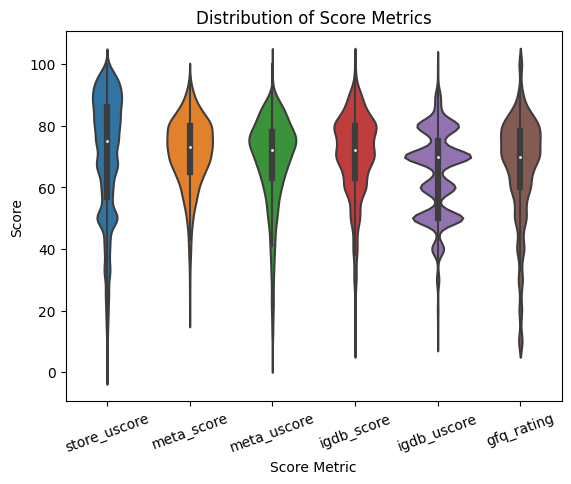

In [252]:
print(game_data.describe())


# Violin plot to show distribution of scores. In matplotlib we'd have to melt the scores first, but not
# with seaborn
scor_dist_plt = sns.violinplot(game_data[['store_uscore', 'meta_score', 'meta_uscore',
                                       'igdb_score', 'igdb_uscore', 'gfq_rating']])
scor_dist_plt.set(xlabel='Score Metric', ylabel='Score', title='Distribution of Score Metrics')

# Rotate the x-axis labels to see them better
scor_dist_plt.tick_params(axis='x',rotation=20)

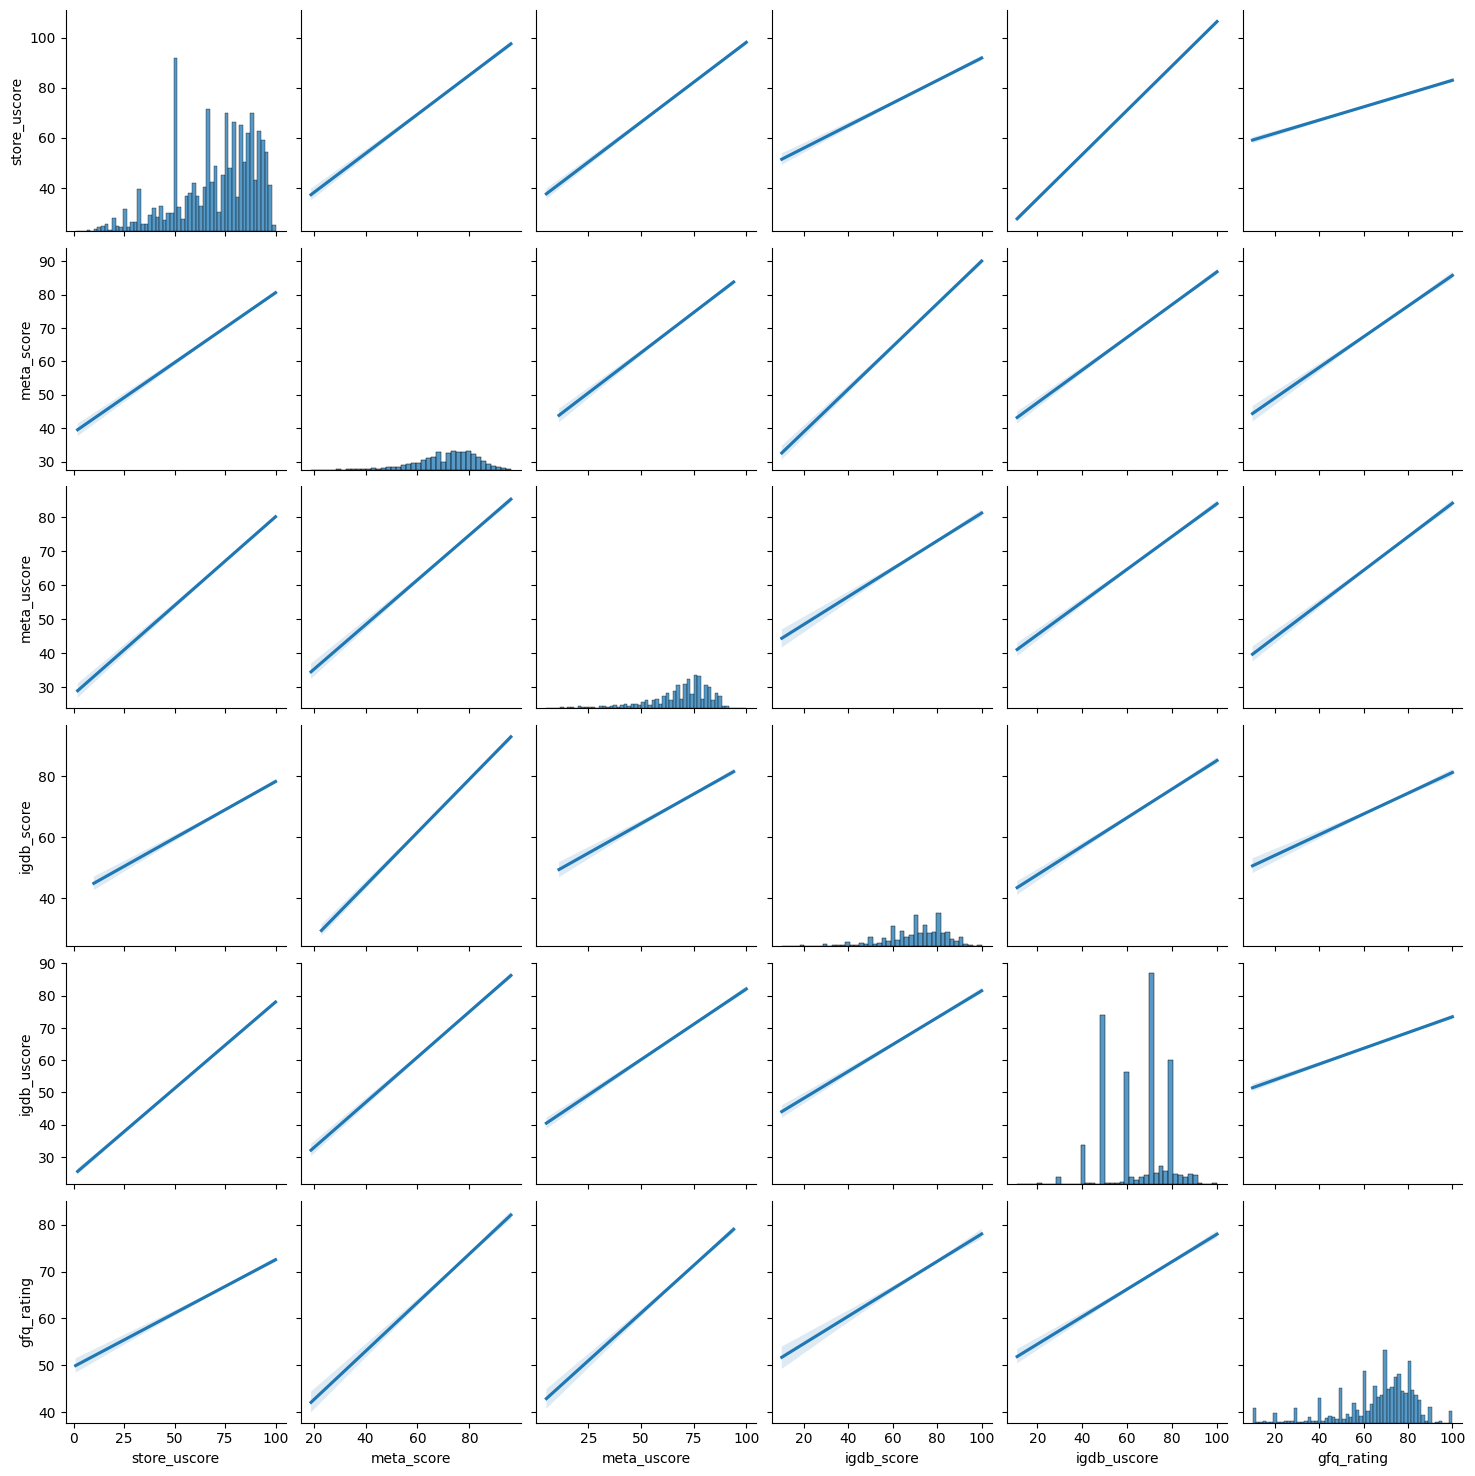

In [253]:
# Plots to see relationship between the various scores. We should expect to see large positive covariances.
# Scatter turned off for clarity.
score_pair_plot = sns.pairplot(game_data[['store_uscore', 'meta_score', 'meta_uscore',
                                       'igdb_score', 'igdb_uscore', 'gfq_rating']],
                               kind='reg', dropna=True, plot_kws=dict(scatter=False))

Correlation coeff. between difficulty and game length (single): 
0.1766718991202775

Correlation coeff. between difficulty and game length (complete): 
0.21939791220468677


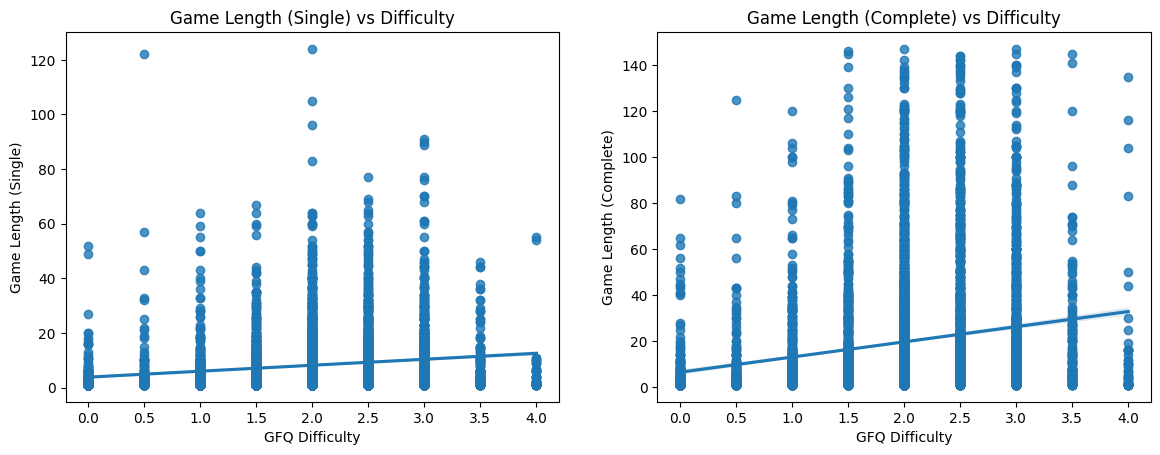

In [254]:
# Surprisingly, it seems that there's not much correlation between length and difficulty.

# Remove outliers (length greater than 150 hours, since if the game takes longer than that, it's just being
# annoying)
len_diff_df = game_data[(game_data['hltb_single'] < 150) & (game_data['hltb_complete'] < 150)]

# Create two regression plots
f, axes = plt.subplots(1, 2)
diff_len_plt1 = sns.regplot(len_diff_df, x='gfq_difficulty', y='hltb_single', ax=axes[0])
diff_len_plt2 = sns.regplot(len_diff_df, x='gfq_difficulty', y='hltb_complete', ax=axes[1])

f.set(figwidth=14)
diff_len_plt1.set(xlabel='GFQ Difficulty', ylabel='Game Length (Single)', title='Game Length (Single) vs Difficulty')
diff_len_plt2.set(xlabel='GFQ Difficulty', ylabel='Game Length (Complete)', title='Game Length (Complete) vs Difficulty')

# Print out the correlation coefficients
print("Correlation coeff. between difficulty and game length (single): ")
print(len_diff_df['gfq_difficulty'].corr(len_diff_df['hltb_single']))
print("\nCorrelation coeff. between difficulty and game length (complete): ")
print(len_diff_df['gfq_difficulty'].corr(len_diff_df['hltb_complete']))

In [255]:
# Let's examine the game scores by large publishers and developers.
# Normally I'd do this as a visualization, but as this will be an interactive webp
# First, add a new column that's the average of the critic and the users. Note that this will simply
# choose whichever one's available if one is missing.
game_data['avg_score'] = game_data[['avg_uscore', 'avg_critic_score']].mean(axis=1)

# Get the sum total of games by developer and publisher
total_pubs = pd.DataFrame(game_data.groupby(by='publishers').size())
total_devs = pd.DataFrame(game_data.groupby(by='developers').size())

# Get the totals of games that have high scores by publishers and developers
hi_score_by_pub = game_data[game_data['avg_score'] >= 85].groupby(by='publishers').size()
hi_score_by_dev = game_data[game_data['avg_score'] >= 85].groupby(by='developers').size()

# Merge into single dataframes (renaming columns and resetting indexes is necessary in this case)
total_pubs = total_pubs.merge(hi_score_by_pub.to_frame(), on='publishers',
                              how='left').rename(columns={'0_x':'Total Games', '0_y':'High Scoring Games'}).reset_index()
total_devs = total_devs.merge(hi_score_by_dev.to_frame(), on='developers',
                              how='left').rename(columns={'0_x':'Total Games', '0_y':'High Scoring Games'}).reset_index()

# Sort the dataframes and drop the rows with barely any games or with no reviews
total_devs = total_devs[total_devs['Total Games'] >= 10].dropna().sort_values(by=['developers'])
total_pubs = total_pubs[total_pubs['Total Games'] >= 10].dropna().sort_values(by=['publishers'])

# Drop the first row of publishers, as it combined all publishers with just empty strings into one
total_pubs = total_pubs.tail(-1)

# Convert High Scoring Games column from floats to ints
total_devs['High Scoring Games'] = total_devs['High Scoring Games'].astype(int)
total_pubs['High Scoring Games'] = total_pubs['High Scoring Games'].astype(int)

display(
    HTML(
        "<h4> Developers:\n </h4>" +
        "<div style='height: 200px; width: 100px; overflow: auto; width: fit-content'; display: inline-block;>" +
        total_devs.to_html(index=False, justify='justify-all') + 
        "</div>" +
        "<h4> \nPublishers:\n </h4>" +
        "<div style='height: 200px; overflow: auto; width: fit-content'; display: inline-block;>" +
        total_pubs.to_html(index=False, justify='justify-all') + 
        "</div>"
    )
)


developers,Total Games,High Scoring Games
07th Expansion,10,8
10tons Ltd,14,1
AFBIK Studio,15,3
Alawar Entertainment,16,1
Aldorlea Games,18,1
Anarchy Enterprises,13,1
Andy Jurko,14,4
Arc System Works,27,5
Artifex Mundi,19,1
Astronomic Games,13,3


[None]

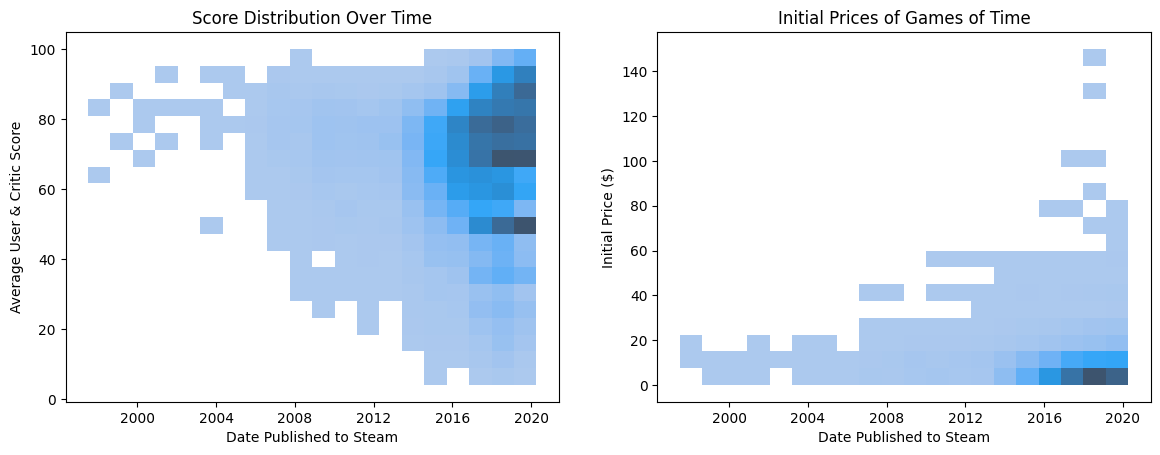

In [256]:
# Show score distribution over time using a kdeplot. We'll remove anything over 150 as anything 
# over that is just stupid, and an outlier that won't help.

f, axes = plt.subplots(1, 2)
score_trend_plt = sns.histplot(game_data[game_data['Initial Price'] <= 150], x='published_store', bins=20,
                              y='avg_score', kde=True, ax=axes[0])
score_trend_plt.set(xlabel='Date Published to Steam', ylabel='Average User & Critic Score',
                   title='Score Distribution Over Time', )

score_trend_plt = sns.histplot(game_data[game_data['Initial Price'] <= 150], x='published_store', bins=20,
                               y='Initial Price', kde=True,  ax=axes[1])
score_trend_plt.set(xlabel='Date Published to Steam', ylabel='Initial Price ($)',
                   title='Initial Prices of Games of Time')
f.set(figwidth=14)

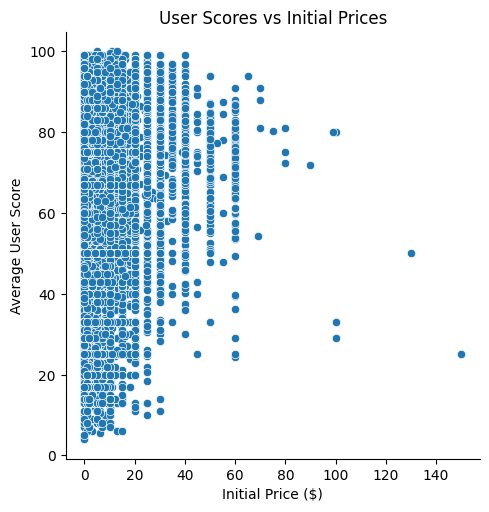

In [257]:
# See if there's a correlation between initial price and user score
score_price_plt = sns.relplot(game_data[game_data['Initial Price'] <= 150], x='Initial Price', y='avg_uscore')
score_price_plt.set(xlabel='Initial Price ($)', ylabel='Average User Score', title='User Scores vs Initial Prices')

Create tags model. While there are technically quantities for each tag, I'm removing them as I think
the more generic tags will always be larger anyways so I dont think the numbers will be meaningful

In [258]:
# First, let's remember what we're working with
display(game_data['Tags'])

# As was seen previously, there were some NaNs in the tags. Let's remove them.
game_data.dropna(subset=['Tags'], inplace=True)
# The dtype of Tags is object. We need to convert it to string to use regex
game_data['Tags'] = game_data['Tags'].astype('string')

# For each element in the Tags column, we'll capture all tags by capture groups using the regex below.
# I searched beforehand to make sure there weren't any : or , in the tag names.
# We'll set the returned Series of arrays as a new Series.
clean_tags = game_data['Tags'].apply(lambda x: re.findall(r"([^,:]+): \d+", x))
display(clean_tags)

0        Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...
1        Action: 754, FPS: 312, Multiplayer: 264, Class...
2        FPS: 791, World War II: 255, Multiplayer: 205,...
3        Action: 631, FPS: 142, Classic: 109, Multiplay...
4        FPS: 893, Action: 335, Classic: 262, Sci-fi: 2...
                               ...                        
32714    Co-op Campaign: 120, Family Friendly: 113, Loc...
32716    Strategy: 32, Turn-Based: 12, Dark Fantasy: 11...
32717    Hidden Object: 114, Education: 109, Puzzle: 10...
32720    Simulation: 209, Free to Play: 203, Casual: 19...
32723    Free to Play: 78, Simulation: 64, Action: 52, ...
Name: Tags, Length: 32056, dtype: object

0        [Action,  FPS,  Multiplayer,  Shooter,  Classi...
1        [Action,  FPS,  Multiplayer,  Classic,  Hero S...
2        [FPS,  World War II,  Multiplayer,  Shooter,  ...
3        [Action,  FPS,  Classic,  Multiplayer,  Shoote...
4        [FPS,  Action,  Classic,  Sci-fi,  Singleplaye...
                               ...                        
32714    [Co-op Campaign,  Family Friendly,  Local Co-O...
32716    [Strategy,  Turn-Based,  Dark Fantasy,  Diffic...
32717    [Hidden Object,  Education,  Puzzle,  Card Gam...
32720    [Simulation,  Free to Play,  Casual,  Sailing,...
32723    [Free to Play,  Simulation,  Action,  Casual, ...
Name: Tags, Length: 32039, dtype: object

Now, what we're going to do is turn each array into a series, and then stack them into a single multi-index Series

In [259]:
temp_tags = clean_tags.apply(pd.Series).stack()
temp_tags


0      0                Action
       1                   FPS
       2           Multiplayer
       3               Shooter
       4               Classic
                   ...        
32723  8                Horror
       9        Sexual Content
       10     Great Soundtrack
       11               Nudity
       12                Co-op
Length: 314840, dtype: object

In [260]:
# Create dummy variables and sum at level = 0 to get rid of the multi index
temp_tags = pd.get_dummies(temp_tags).sum(level=0)
temp_tags 

/tmp/ipykernel_392/4250580474.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  temp_tags = pd.get_dummies(temp_tags).sum(level=0)


,"""1990s""","""Beat em up""","""Shoot Em Up""",1980s,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,...,Voxel,Walking Simulator,War,Wargame,Warhammer 40K,Western,Word Game,World War II,Wrestling,Zombies
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32714,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32717,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32720,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [261]:
# Now let's add the tags to game_data
game_data = game_data.merge(temp_tags, right_index=True, left_index=True)

Female Protagonist
0    67.717399
1    72.476786
Name: avg_uscore, dtype: float64

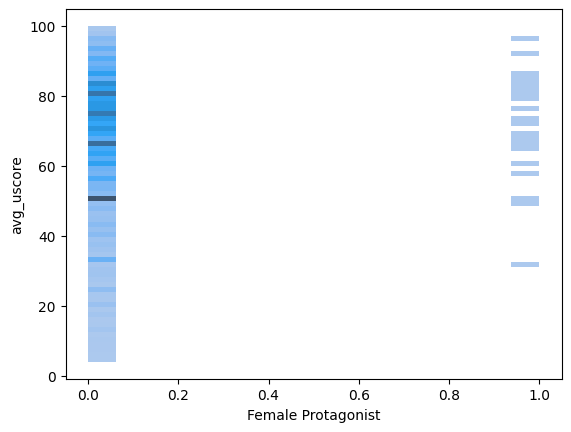

In [263]:
# Quick detour to see if there's a difference in average user score when there's a female protagonist
fem_score_plt = sns.histplot(game_data, x=game_data['Female Protagonist'], y='avg_uscore')
game_data.groupby(by='Female Protagonist')['avg_uscore'].mean()